<a href="https://colab.research.google.com/github/Punambhatt/Machine-Learning/blob/main/SGD_BGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [1]:
def generate_data(num_samples):
  np.random.seed(42)
  X=np.random.rand(num_samples,1)*10
  y=3*X + 7+np.random.rand(num_samples,1)
  return X,y


In [3]:
def compute_loss(y_true, y_pred):
  return np.mean ((y_true-y_pred)**2)



In [5]:
def batch_gradient_descent(X,y,epochs,lr=0.01):
  m,n=X.shape
  X = np.c_[np.ones((m, 1)), X]
  theta = np.random.randn(n + 1, 1)
  losses = []
  for epoch in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = 2 / m * X.T.dot(errors)
        theta -= lr * gradients
        loss = compute_loss(y, predictions)
        losses.append(loss)
  return theta,losses

In [6]:
small_dataset_size = 1000
large_dataset_size = 10000000

X_small, y_small = generate_data(small_dataset_size)
X_large, y_large = generate_data(large_dataset_size)

In [20]:

start_time = time.time()
theta_bgd_small, losses_bgd_small = batch_gradient_descent(X_small, y_small, epochs=50)
time_bgd_small = time.time() - start_time

start_time = time.time()
theta_bgd_large, losses_bgd_large = batch_gradient_descent(X_large, y_large, epochs=50)
time_bgd_large = time.time() - start_time

In [15]:
def stochastic_gradient_descent(X, y, epochs, lr=0.01):
    m, n = X.shape
    X = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(n + 1, 1)
    losses = []
    for epoch in range(epochs):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        predictions = xi.dot(theta)
        errors = predictions - yi
        gradients = 2 * xi.T.dot(errors)
        theta -= lr * gradients
        loss = compute_loss(y, predictions)
        losses.append(loss)
    return theta,losses


In [17]:

start_time = time.time()
theta_sgd_small, losses_sgd_small = stochastic_gradient_descent(X_small, y_small, epochs=50)
time_sgd_small = time.time() - start_time

start_time = time.time()
theta_sgd_large, losses_sgd_large = stochastic_gradient_descent(X_large, y_large, epochs=50)
time_sgd_large = time.time() - start_time

In [23]:
print("Batch Gradient Descent (Small Dataset): Time = {:.4f}s, Final Loss = {:.4f}".format(time_bgd_small, losses_bgd_small[-1]))
print("Batch Gradient Descent (Large Dataset): Time = {:.4f}s, Final Loss = {:.4f}".format(time_bgd_large, losses_bgd_large[-1]))

print("Stochastic Gradient Descent (Small Dataset): Time = {:.4f}s, Final Loss = {:.4f}".format(time_sgd_small, losses_sgd_small[-1]))
print("Stochastic Gradient Descent (Large Dataset): Time = {:.4f}s, Final Loss = {:.4f}".format(time_sgd_large, losses_sgd_large[-1]))

Batch Gradient Descent (Small Dataset): Time = 0.0028s, Final Loss = 3.3420
Batch Gradient Descent (Large Dataset): Time = 8.5454s, Final Loss = 9.9718
Stochastic Gradient Descent (Small Dataset): Time = 0.0052s, Final Loss = 84.0292
Stochastic Gradient Descent (Large Dataset): Time = 2.4216s, Final Loss = 193.6376


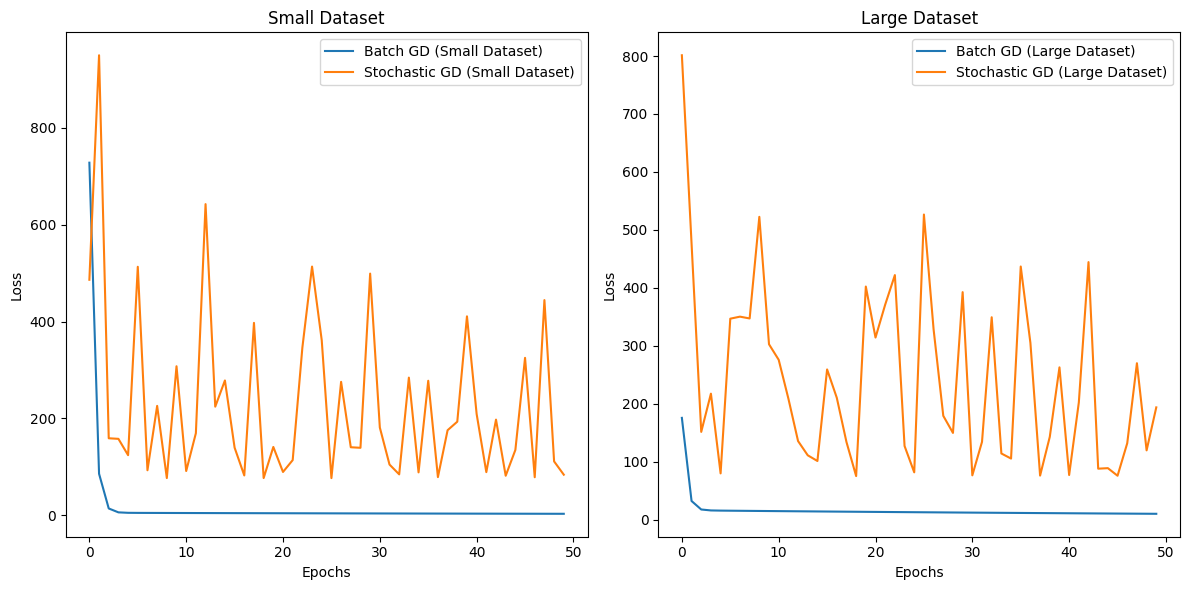

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(losses_bgd_small, label="Batch GD (Small Dataset)")
plt.plot(losses_sgd_small, label="Stochastic GD (Small Dataset)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Small Dataset")

plt.subplot(1, 2, 2)
plt.plot(losses_bgd_large, label="Batch GD (Large Dataset)")
plt.plot(losses_sgd_large, label="Stochastic GD (Large Dataset)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Large Dataset")

plt.tight_layout()
plt.show()